<a href="https://colab.research.google.com/github/rhodes-byu/cs180-winter25/blob/main/notebooks/06a-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Introduction to EDA](#introduction)
2. [Statistical Data Types](#data-types)
   - [Categorical Variables](#categorical)
   - [Quantitative Variables](#quantitative)
   - [Ordinal Variables](#ordinal)
3. [Univariate Analysis](#univariate)
   - [Mean](#mean)
   - [Median](#median)
   - [Measures of Variability](#variability)
   - [Variance](#variance)
   - [Standard Deviation and IQR](#standard-deviation)
4. [Outlier Detection and Treatment](#outliers)
   - [Z-Score Method](#z-score)
   - [IQR Method](#iqr-method)
5. [Bivariate and Multivariate Analysis](#bivariate)
   - [Scatter Plots](#scatter-plots)
   - [Correlation Analysis](#correlation)
   - [R-squared](#r-squared)
6. [Data Quality Assessment](#quality)
7. [Case Study: Adult Income Dataset](#case-study)
8. [In-Class Programming Exercises](#exercises)
9. [Summary and Best Practices](#summary)

## What is Exploratory Data Analysis? {#introduction}

**Exploratory Data Analysis (EDA)** is an approach to analyzing datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods. EDA is used for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

### Why is EDA Important?

- **Data Understanding**: Get familiar with your data structure, patterns, and relationships
- **Quality Assessment**: Identify missing values, outliers, and inconsistencies
- **Feature Engineering**: Discover which variables are most relevant for analysis
- **Hypothesis Generation**: Form initial hypotheses about relationships in the data
- **Model Selection**: Choose appropriate statistical models based on data characteristics

### EDA Process Overview

1. **Data Collection & Loading**
2. **Data Quality Assessment**
3. **Univariate Analysis** (single variables)
4. **Bivariate Analysis** (relationships between pairs)
5. **Multivariate Analysis** (complex relationships)
6. **Insights & Conclusions**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Statistical Data Types {#data-types}

Understanding data types is crucial for choosing appropriate analysis methods and visualizations.

### Categorical (Discrete) Variables {#categorical}
- **Definition**: Variables that represent categories or groups
- **Types**:
  - **Nominal**: No inherent order (e.g., colors, gender, city names)
  - **Ordinal**: Natural ordering exists (e.g., education levels, satisfaction ratings)
- **Analysis Methods**: Frequency tables, bar charts, chi-square tests
- **Encoding**: Often requires one-hot encoding or label encoding for machine learning

In [2]:
np.random.seed(1990)

In [3]:
# string categories
cities = ["provo", "orem", "san francisco"]
cities_sample = np.random.choice(cities,p=[.5, .4, .1], size=10) # multiclass
print(cities_sample)

['orem' 'provo' 'provo' 'orem' 'provo' 'orem' 'san francisco' 'provo'
 'orem' 'provo']


In [4]:
sex = ["male", "female"] # binary
sex_sample = np.random.choice(sex, size=100, p=[0.3, 0.7])

In [5]:
sex_sample

array(['male', 'female', 'male', 'male', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'male', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'male', 'female',
       'male', 'female', 'female', 'female', 'female', 'female', 'female',
       'male', 'female', 'male', 'male', 'female', 'female', 'male',
       'male', 'female', 'female', 'male', 'female', 'female', 'female',
       'female', 'female', 'male', 'female', 'female', 'female', 'female',
       'female', 'male', 'female', 'male', 'female', 'female', 'female',
       'male', 'female', 'male', 'male', 'female', 'female', 'female',
       'male', 'female', 'female', 'female', 'male', 'female', 'female',
       'female', 'female', 'female', 'male', 'female', 'female', 'female',
       'female', 'female', 'male', 'male', 'female', 'female', 'female',
       'male', 'male', 'female', 'female', 'female', 'female', 'female',
       'male', 'female', 'male', 'female', 'femal

In [6]:
# Add a one-hot encoding example of cities
one_hot = np.zeros((10, len(cities)))
for i, city in enumerate(cities_sample):
    one_hot[i, cities.index(city)] = 1

In [7]:
print(one_hot)

[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [8]:
df_cities = pd.DataFrame(cities_sample, columns=['city'])

# Perform one-hot encoding using pandas
one_hot_encoded_df = pd.get_dummies(df_cities, columns=['city'])


one_hot_encoded_df


,city_orem,city_provo,city_san francisco
0,True,False,False
1,False,True,False
2,False,True,False
3,True,False,False
4,False,True,False
5,True,False,False
6,False,False,True
7,False,True,False
8,True,False,False
9,False,True,False


In [9]:
# numerical categories
np.random.randint(0, 5, 10)

array([3, 0, 2, 1, 4, 3, 1, 1, 4, 2], dtype=int32)

### Quantitative (Continuous) Variables {#quantitative}
- **Definition**: Variables that represent measurable quantities
- **Types**:
  - **Discrete**: Countable values (e.g., number of children, test scores)
  - **Continuous**: Infinite possible values within a range (e.g., height, weight, temperature)
- **Types of Plots**: Histograms, box plots, scatter plots
- **Statistical Measures**: Mean, median, standard deviation, percentiles

In [10]:
np.random.multivariate_normal(np.zeros(3), np.eye(3), 10)

array([[ 0.08724772,  3.27634041, -0.8246385 ],
       [-0.71917496, -0.8179634 , -1.15751868],
       [ 0.63061968, -0.93017548, -0.87055998],
       [-0.03203484,  1.9975369 , -2.08897477],
       [-0.26969348, -1.74033027,  0.35457186],
       [-1.11772183, -1.29515365,  0.94715018],
       [ 0.51007251,  0.14167644, -0.73799584],
       [ 1.45753852,  1.42617512, -1.08978452],
       [-0.49019113, -1.32207244,  0.60863663],
       [ 0.266655  , -1.90067913, -1.48237482]])

### Ordinal Variables {#ordinal}
- A variable that captures relative ranking of data
- Allow us to say which has less and which has more
- Difficult to say by "how much"

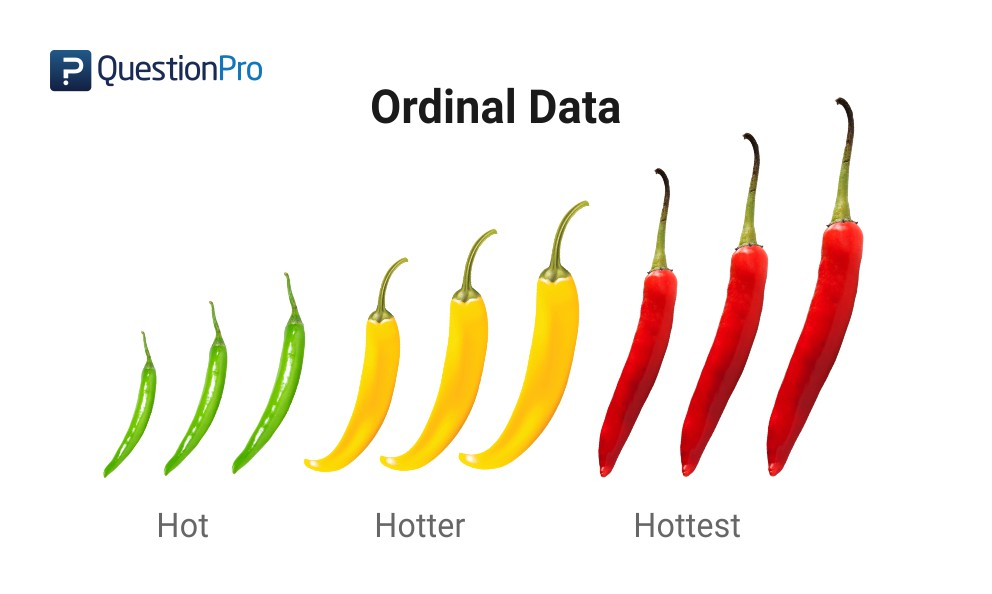

In [11]:
scale= ["mild", "hot", "hotter", "hottest"]
np.random.choice(scale, size=100)

array(['mild', 'hottest', 'hot', 'hot', 'hottest', 'hotter', 'hottest',
       'mild', 'hot', 'mild', 'hotter', 'mild', 'hotter', 'hotter',
       'mild', 'hottest', 'hotter', 'mild', 'mild', 'hottest', 'hot',
       'hotter', 'mild', 'hot', 'hottest', 'mild', 'hottest', 'hottest',
       'hottest', 'mild', 'mild', 'hottest', 'hot', 'hotter', 'hot',
       'hot', 'hot', 'hot', 'hot', 'hotter', 'hotter', 'hotter', 'mild',
       'hot', 'hot', 'hot', 'hot', 'mild', 'hottest', 'hotter', 'hottest',
       'hottest', 'hotter', 'hot', 'hotter', 'hotter', 'hotter',
       'hottest', 'hot', 'hottest', 'hotter', 'hottest', 'hot', 'mild',
       'mild', 'hottest', 'hotter', 'hottest', 'hotter', 'hot', 'mild',
       'hotter', 'hottest', 'hot', 'hottest', 'hottest', 'hottest', 'hot',
       'mild', 'hotter', 'hottest', 'hottest', 'hotter', 'mild', 'hot',
       'hottest', 'hotter', 'hot', 'hottest', 'hotter', 'hottest',
       'hotter', 'hotter', 'hotter', 'hotter', 'hotter', 'hotter', 'hot',
   

In [12]:
# Mapping to numerical values using Pandas
df = pd.DataFrame(np.random.choice(scale, size=100), columns=['temperature'])
df['temperature'] = df['temperature'].map({'mild': 0, 'hot': 1, 'hotter': 2, 'hottest': 3})
df

,temperature
0,1
1,3
2,3
3,3
4,3
...,...
95,1
96,1
97,2
98,2


# Exploratory Data Analysis (EDA) Continuous Data:
- Plots and statistics
- Univariate
- Multivariate

In [13]:
x = np.random.normal(0, 3, 1000) # creates a normal distribution with mean 0 and std 3 and sample size 1000
y = np.random.normal(10, 1, 1000) # creates a normal distribution with mean 10 and std 1 and sample size 1000

### Univariate Plots and Statistics

### Central Tendency
- key question: what is a distribution?

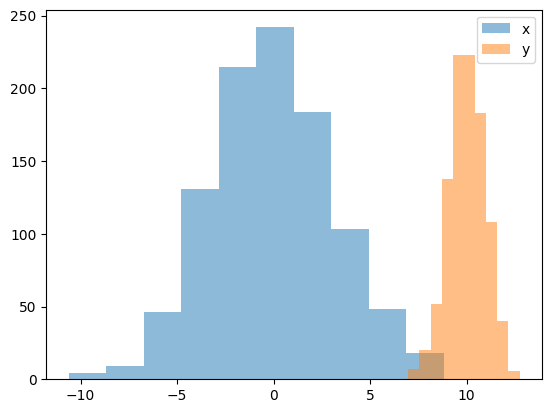

In [14]:
plt.hist(x, alpha=.5, label='x') # plot a histogram of array x
plt.hist(y, alpha=.5, label='y')
plt.legend()
plt.show()

### Mean (Arithmetic Average) {#mean}

The mean is the sum of all values divided by the number of observations.

**Formula**: $\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i = \frac{x_1 + x_2 + ... + x_n}{n}$

**When to use**:
- Data is approximately normally distributed
- No extreme outliers present

**Advantages**: Easy to calculate, considers all data points
**Disadvantages**: Sensitive to outliers

**Interpretation**: The average value around which data points cluster.

This is useful when we have normally distributed data without extreme outliers.

# Univariate Analysis {#univariate}

Univariate analysis examines each variable individually to understand its distribution, central tendency, and variability.

## Measures of Central Tendency

Central tendency describes the center point of a dataset.

In [15]:
# mean
mean_x = np.mean(x)
print(mean_x)

-0.02325180238426423


In [16]:
mean_y = np.mean(y)
print(mean_y)

10.019825293414232


### Median (Middle Value) {#median}

The median is the middle value when data is sorted in ascending order.

**When to use**:
- Data has outliers or is skewed
- You need a robust measure of central tendency

**Advantages**: Not affected by outliers, represents the "typical" value well
**Disadvantages**: Doesn't use all data points, harder to use in further calculations

**Calculation**:
- For odd n: median = middle value
- For even n: median = average of two middle values

In [17]:
# median
median_x = np.median(x)

In [18]:
median_y = np.median(y)

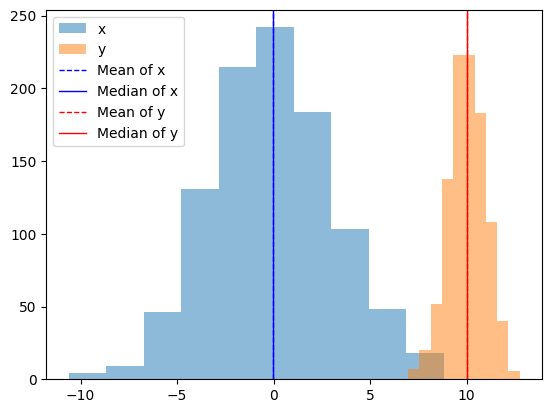

In [19]:
plt.hist(x, alpha=.5, label='x') # plot a histogram of array x
plt.hist(y, alpha=.5, label='y')

# Add vertical lines for the mean and median of x
plt.axvline(np.mean(x), color='blue', linestyle='dashed', linewidth=1, label='Mean of x')
plt.axvline(np.median(x), color='blue', linestyle='solid', linewidth=1, label='Median of x')

# Add vertical lines for the mean and median of y
plt.axvline(np.mean(y), color='red', linestyle='dashed', linewidth=1, label='Mean of y')
plt.axvline(np.median(y), color='red', linestyle='solid', linewidth=1, label='Median of y')

plt.legend()
plt.show()

## Measures of Variability (Spread) {#variability}

Variability measures describe how spread out the data points are from the center.

**Range**: Difference between maximum and minimum values
- Simple but affected by outliers
**Advantages**: Easy to understand and calculate
**Disadvantages**: Sensitive to outliers, doesn't describe distribution shape

### Variance {#variance}

**Definition**: Average of squared differences from the mean

**Population Variance**: $\sigma^2 = \frac{1}{N}\sum_{i=1}^{N}(x_i - \mu)^2$ (when you have all data)
**Sample Variance**: $s^2 = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2$ (uses n-1 for unbiased estimate)

**Key points**:
- Higher variance = more spread out data
- Variance is in squared units of the original data

In [20]:
# Variance by hand
np.mean(np.power(x - mean_x, 2))

np.float64(9.923272417831944)

In [21]:
# Variance using numpy
np.var(x)

np.float64(9.923272417831944)

### Standard Deviation {#standard-deviation}

**Definition**: Square root of variance, bringing the measure back to original units

**Formula**: $\sigma = \sqrt{\sigma^2}$ or $s = \sqrt{s^2}$

**Interpretation**:
- Approximately 68% of data falls within 1 standard deviation of the mean (for normal distributions)
- Approximately 95% of data falls within 2 standard deviations of the mean

### Interquartile Range (IQR)

**Definition**: Difference between 75th percentile (Q3) and 25th percentile (Q1)

**Formula**: IQR = Q3 - Q1

**Advantages**: Robust to outliers, describes middle 50% of data
**Use case**: Better than standard deviation when data has outliers

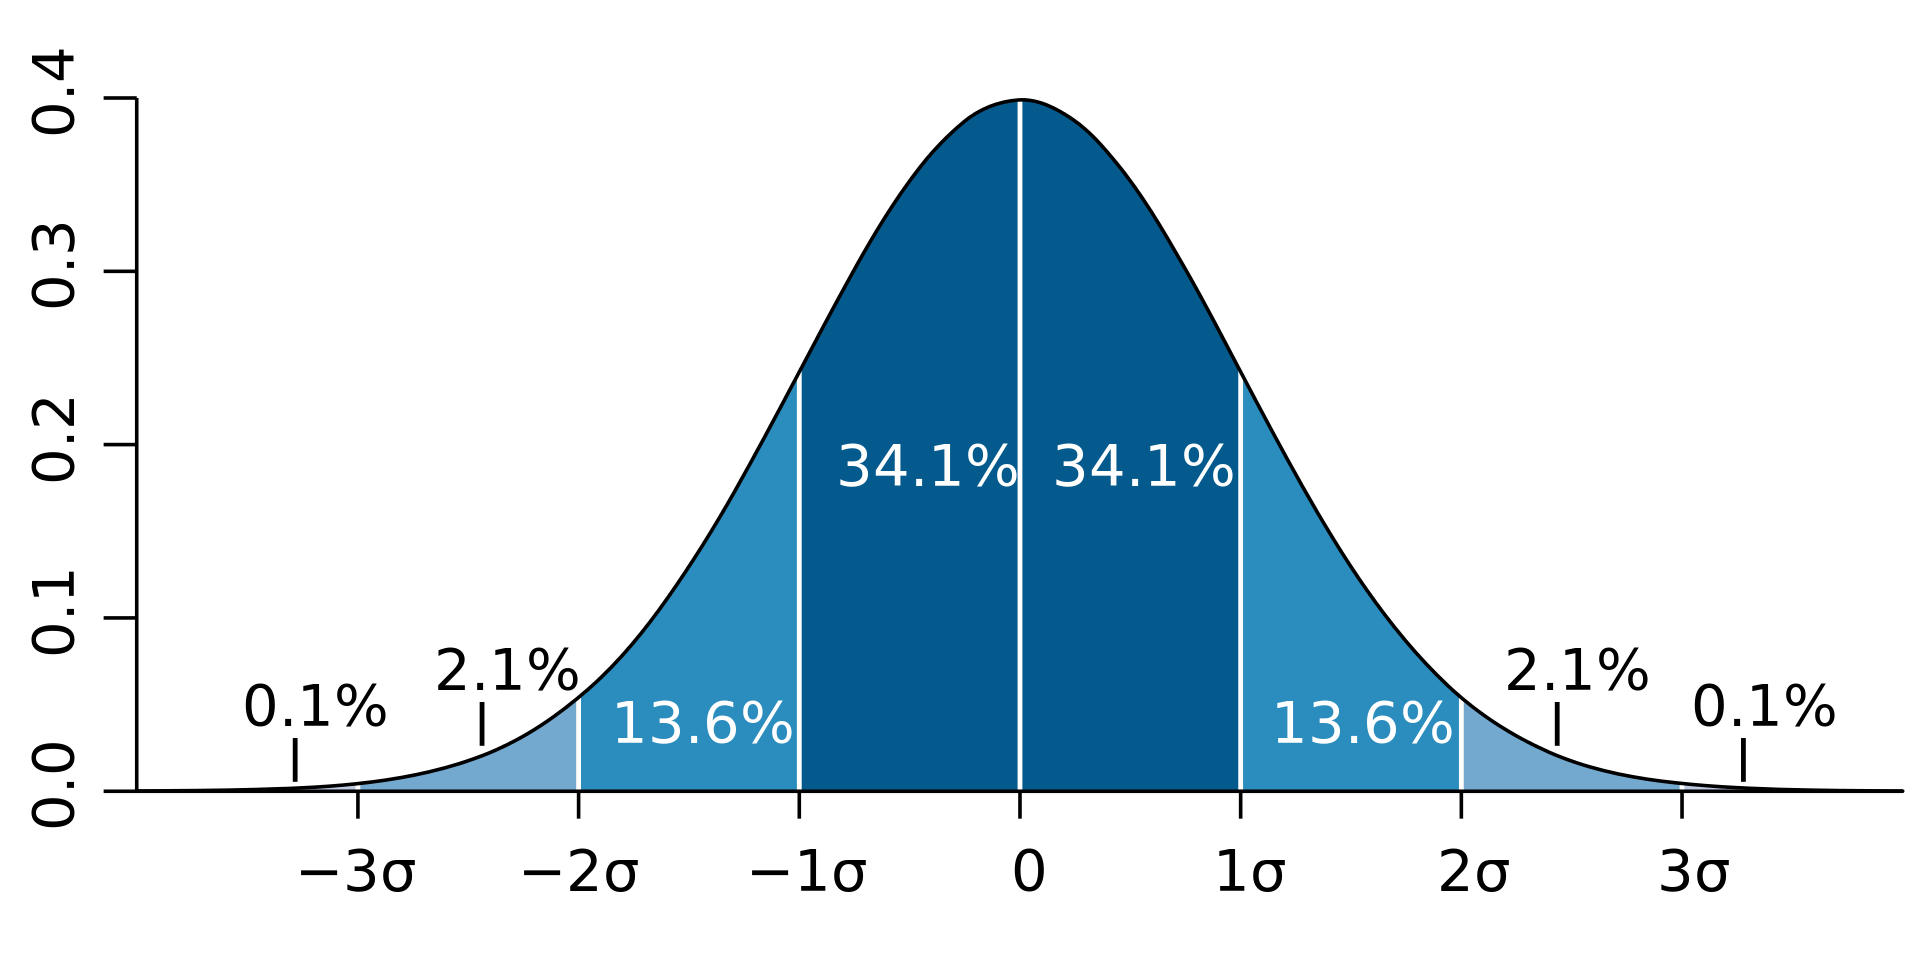

### Interquartile Range (IQR)
**Definition**: Difference between 75th percentile (Q3) and 25th percentile (Q1)
**Formula**: IQR = Q3 - Q1
**Advantages**: Robust to outliers, describes middle 50% of data
**Use case**: Better than standard deviation when data has outliers

# Outlier Detection {#outliers}

Outliers are data points that significantly differ from other observations. They can indicate:
- **Data entry errors** (typos, measurement mistakes)
- **Genuine extreme values** (rare but valid observations)
- **Different populations** (subgroups with different characteristics)

## Z-Score Method {#z-score}

**Definition**: Measures how many standard deviations a data point is from the mean

**Formula**: $z = \frac{x - \bar{x}}{s}$

**Outlier criteria**: Typically |z| > 2 or |z| > 3 (depending on strictness)

**When to use**: Data is approximately normally distributed

In [22]:
x = np.random.normal(100, 20, 1000) # create a normal distribution with mean 100 and std 20 and sample size 1000

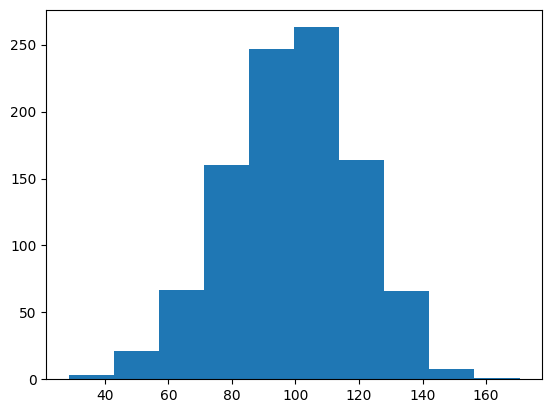

In [23]:
plt.hist(x)
plt.show()

In [24]:
z_scores = (x - x.mean()) / x.std()

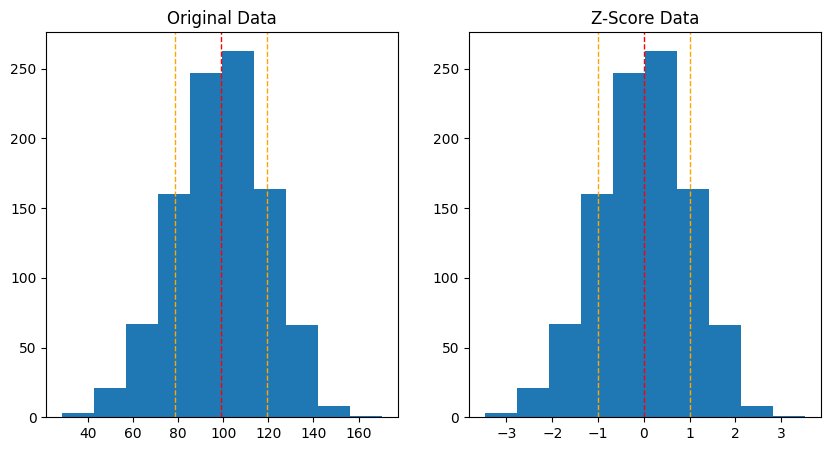

In [25]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
mean_x = np.mean(x)
std_x = np.std(x)

# Add mean +- stdev
axes[0].axvline(mean_x, color='r', linestyle='dashed', linewidth=1)
axes[0].axvline(mean_x + std_x, color='orange', linestyle='dashed', linewidth=1)
axes[0].axvline(mean_x - std_x, color='orange', linestyle='dashed', linewidth=1)
axes[0].hist(x)
axes[0].title.set_text('Original Data')

axes[1].axvline(0, color='r', linestyle='dashed', linewidth=1)
axes[1].axvline(1, color='orange', linestyle='dashed', linewidth=1)
axes[1].axvline(-1, color='orange', linestyle='dashed', linewidth=1)
axes[1].hist(z_scores)
axes[1].title.set_text('Z-Score Data')

In [26]:
keep = np.where((z_scores > -2.0) & (z_scores < 2.0))

(array([ 35.,  61., 102., 128., 137., 155., 138.,  96.,  70.,  35.]),
 array([-1.95783172, -1.56314749, -1.16846325, -0.77377902, -0.37909479,
         0.01558945,  0.41027368,  0.80495791,  1.19964214,  1.59432638,
         1.98901061]),
 <BarContainer object of 10 artists>)

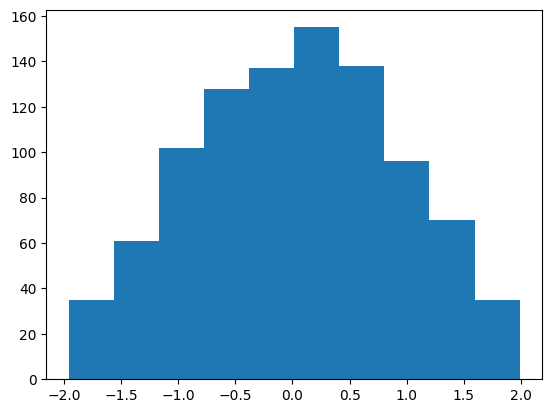

In [27]:
plt.hist(z_scores[keep])

## IQR Method {#iqr-method}

**Definition**: Uses quartiles to identify outliers, more robust than z-score

**Steps**:
1. Calculate Q1 (25th percentile) and Q3 (75th percentile)
2. Calculate IQR = Q3 - Q1
3. Define outlier boundaries:
   - Lower fence = Q1 - 1.5 × IQR
   - Upper fence = Q3 + 1.5 × IQR
4. Any data point outside these fences is considered an outlier

**Advantages**: Works well with skewed data, doesn't assume normal distribution

In [28]:
# IQR Method for outlier detection
def detect_outliers_iqr(data):
    """
    Detect outliers using the IQR method
    """
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    
    outliers = (data < lower_fence) | (data > upper_fence)
    return outliers, lower_fence, upper_fence

# Example usage
outliers_iqr, lower_fence, upper_fence = detect_outliers_iqr(x)
print(f"Lower fence: {lower_fence:.2f}")
print(f"Upper fence: {upper_fence:.2f}")
print(f"Number of outliers: {np.sum(outliers_iqr)}")
print(f"Percentage of outliers: {np.sum(outliers_iqr)/len(x)*100:.1f}%")

Lower fence: 43.18
Upper fence: 155.28
Number of outliers: 4
Percentage of outliers: 0.4%


{'whiskers': [<matplotlib.lines.Line2D at 0x2c7c0780440>,
 'caps': [<matplotlib.lines.Line2D at 0x2c7c07806e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c7c07802f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c7c0780980>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c7c0780ad0>],
 'means': []}

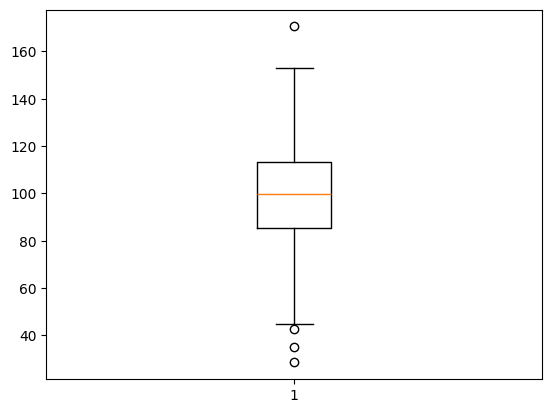

In [29]:
plt.boxplot(x)

## Box Plots for Outliers

In [30]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


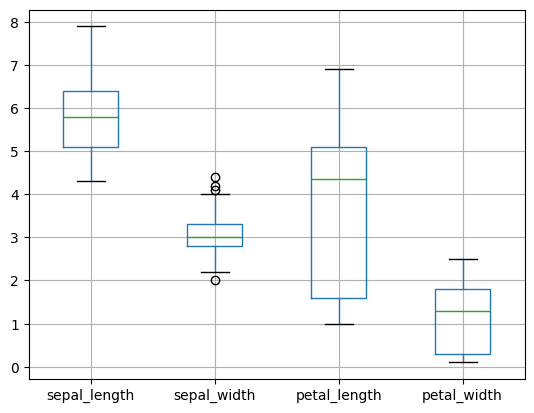

In [31]:
iris.boxplot()
plt.show()

#### Kernel Density Estimation (KDE)

In [32]:
x = np.random.normal(2, 1, size=1000)
y = np.random.gamma(4, 2, size=1000)

<Axes: ylabel='Density'>

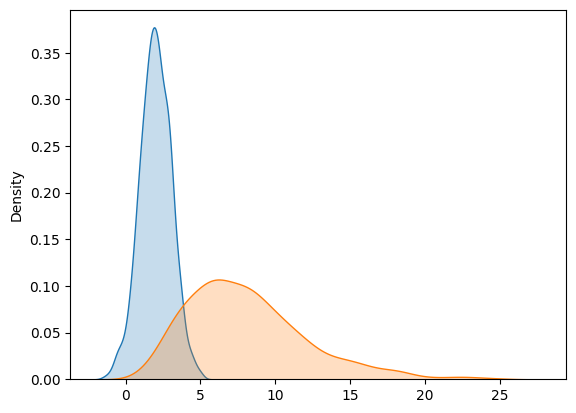

In [33]:
sns.kdeplot(x=x, fill=True)
sns.kdeplot(x=y, fill=True)

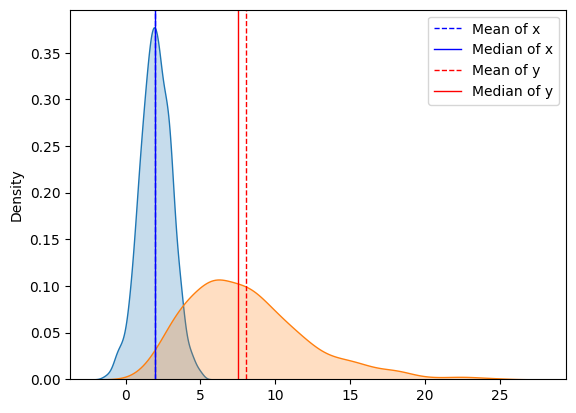

In [34]:
sns.kdeplot(x=x, fill=True)
sns.kdeplot(x=y, fill=True)

# Add vertical lines for the mean and median of x
plt.axvline(np.mean(x), color='blue', linestyle='dashed', linewidth=1, label='Mean of x')
plt.axvline(np.median(x), color='blue', linestyle='solid', linewidth=1, label='Median of x')

# Add vertical lines for the mean and median of y
plt.axvline(np.mean(y), color='red', linestyle='dashed', linewidth=1, label='Mean of y')
plt.axvline(np.median(y), color='red', linestyle='solid', linewidth=1, label='Median of y')

plt.legend()

# Bivariate and Multivariate Analysis {#bivariate}

Bivariate analysis examines relationships between **two variables**, while multivariate analysis looks at relationships among **multiple variables**.

## Key Questions:
- Are two variables related?
- What is the strength and direction of the relationship?
- Can one variable predict another?

## Types of Relationships:
- **Linear**: Straight-line relationship
- **Non-linear**: Curved or complex patterns
- **Positive**: As one increases, the other increases
- **Negative**: As one increases, the other decreases

## Scatter Plots {#scatter-plots}

**Purpose**: Visualize relationships between two continuous variables

**What to look for**:
- **Direction**: Positive or negative relationship
- **Strength**: How tightly points cluster around a pattern
- **Form**: Linear, curved, or no clear pattern
- **Outliers**: Points that don't fit the overall pattern

## Correlation Analysis {#correlation}

**Pearson Correlation Coefficient (r)**: Measures the strength and direction of linear relationships

**Range**: -1 ≤ r ≤ 1
- **r = 1**: Perfect positive correlation
- **r = 0**: No linear correlation  
- **r = -1**: Perfect negative correlation

**Interpretation Guidelines**:
- |r| > 0.7: Strong relationship
- 0.3 < |r| ≤ 0.7: Moderate relationship
- |r| ≤ 0.3: Weak relationship

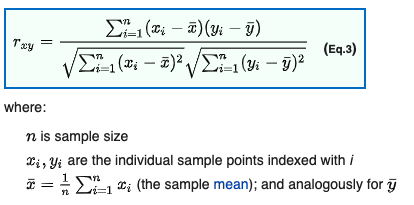

- A measure of linear correlation between two sets of data
- It is the ratio between the covariance of two variables and the product of their standard deviations
- it is essentially a normalised measurement of the covariance, such that the result always has a value between −1 and 1
- As with covariance itself, the measure can only reflect a linear correlation of variables, and ignores many other types of relationship or correlation.

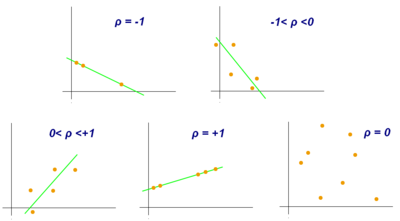

In [35]:
x = np.arange(0, 50)
y = 2.5*x + 10 + np.random.normal(0, 10, len(x))

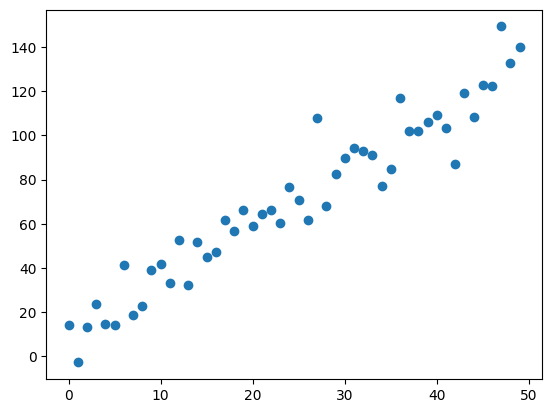

In [36]:
plt.scatter(x, y)

In [37]:
np.corrcoef(x, y)

array([[1.        , 0.96237259],
       [0.96237259, 1.        ]])

In [38]:
np.corrcoef(x, y)[0][1]

np.float64(0.9623725905664376)

In [39]:
X = np.random.multivariate_normal(np.zeros(3), np.eye(3), size=100)

# Create a covariance matrix with some correlations for Y
cov_matrix_Y = np.array([[1, 0.9, 0.5],
                         [0.9, 1, 0.3],
                         [0.5, 0.3, 1]])
Y = np.random.multivariate_normal(np.zeros(3), cov_matrix_Y, size=100)

![Bivaiate Normal](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/MultivariateNormal.png/1100px-MultivariateNormal.png)

In [40]:
X.shape

(100, 3)

In [41]:
Y.shape

(100, 3)

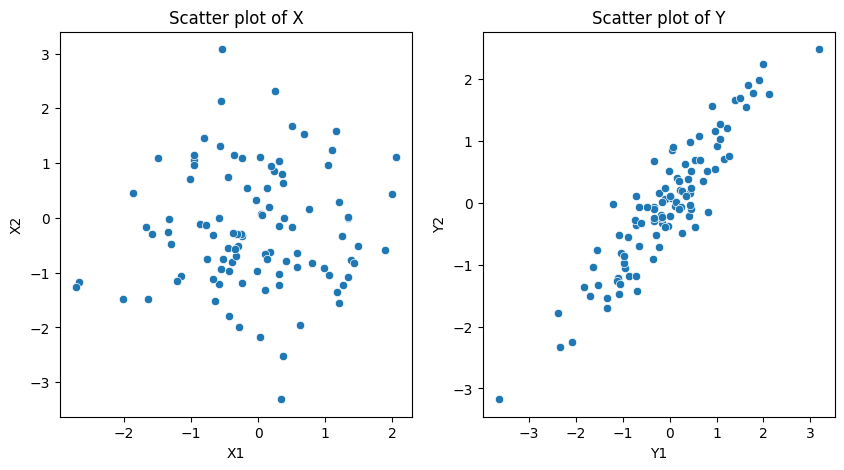

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x=X[:,0], y=X[:,1], ax=axes[0])
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')
axes[0].set_title('Scatter plot of X')

sns.scatterplot(x=Y[:,0], y=Y[:,1], ax=axes[1])
axes[1].set_xlabel('Y1')
axes[1].set_ylabel('Y2')
axes[1].set_title('Scatter plot of Y')

plt.show()

In [43]:
rho_X = np.corrcoef(X.T)
rho_Y = np.corrcoef(Y.T)

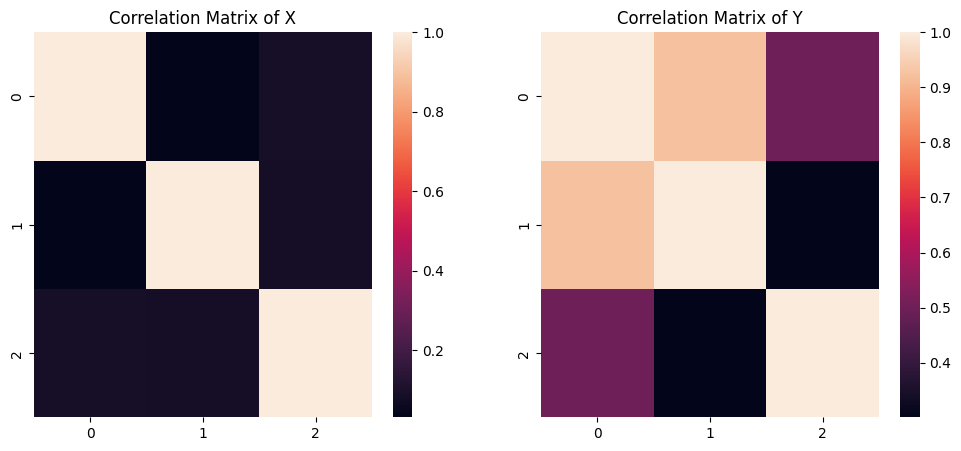

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(rho_X, ax=axes[0])
axes[0].set_title('Correlation Matrix of X')

sns.heatmap(rho_Y, ax=axes[1])
axes[1].set_title('Correlation Matrix of Y')

plt.show()

## R² (Coefficient of Determination) {#r-squared}

**Definition**: Proportion of variance in the dependent variable that is predictable from the independent variable

**Range**: 0 ≤ R² ≤ 1 (0% to 100%)

**Formula**: R² = (correlation coefficient)² = r²

**Interpretation Examples**:
- **R² = 1.0**: Perfect prediction (100% of variance explained)
- **R² = 0.49**: 49% of the variability is explained by the model
- **Higher R²**: Better model fit
- **Lower R²**: More unexplained variance

**Important Notes**:
- R² always increases with more variables (use Adjusted R² for multiple regression)
- High R² doesn't guarantee the model is good (could be overfitting)
- Low R² doesn't mean the relationship isn't meaningful

Total Sum of Squares (proportial to the variance of the data):



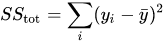

Global Mean of the data:

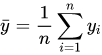

Sum of squares of the Residuals:

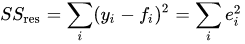

**Interpretation**: Suppose R2 = 0.49. This implies that 49% of the variability of the dependent variable in the data set has been accounted for, and the remaining 51% of the variability is still unaccounted for. For regression models, the regression sum of squares, also called the explained sum of squares, is defined as

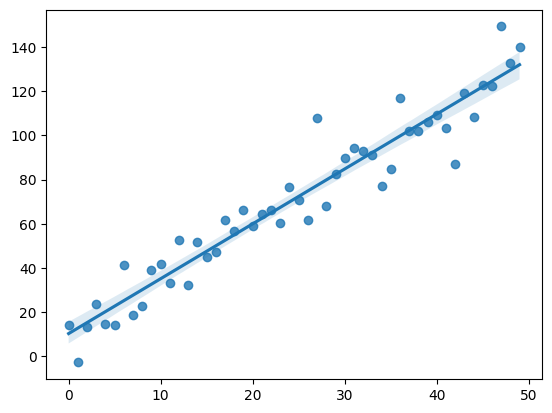

In [106]:
sns.regplot(x=x,y=y)
plt.show()

### Case Study

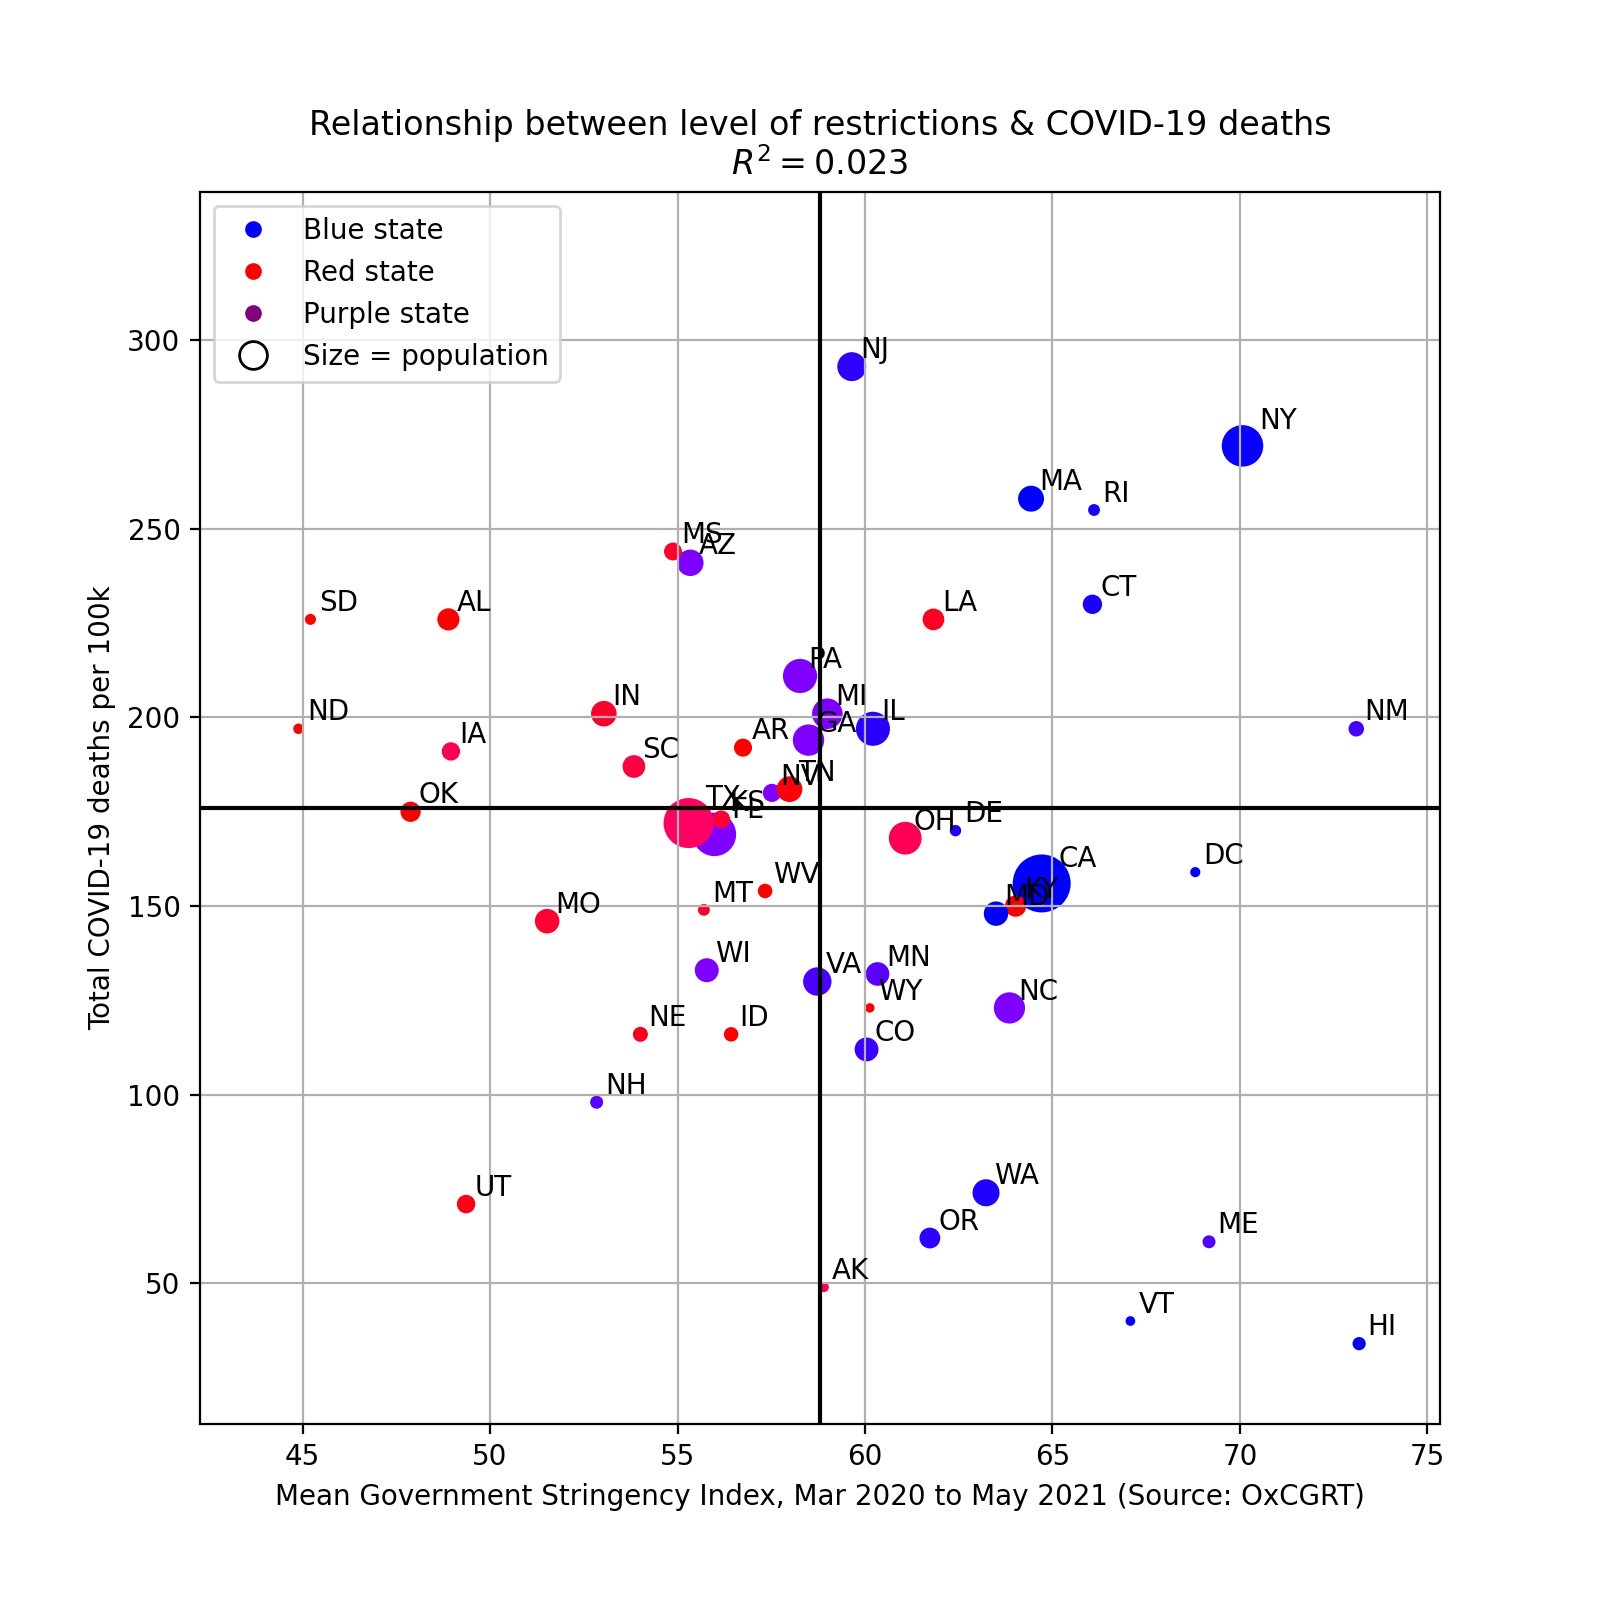

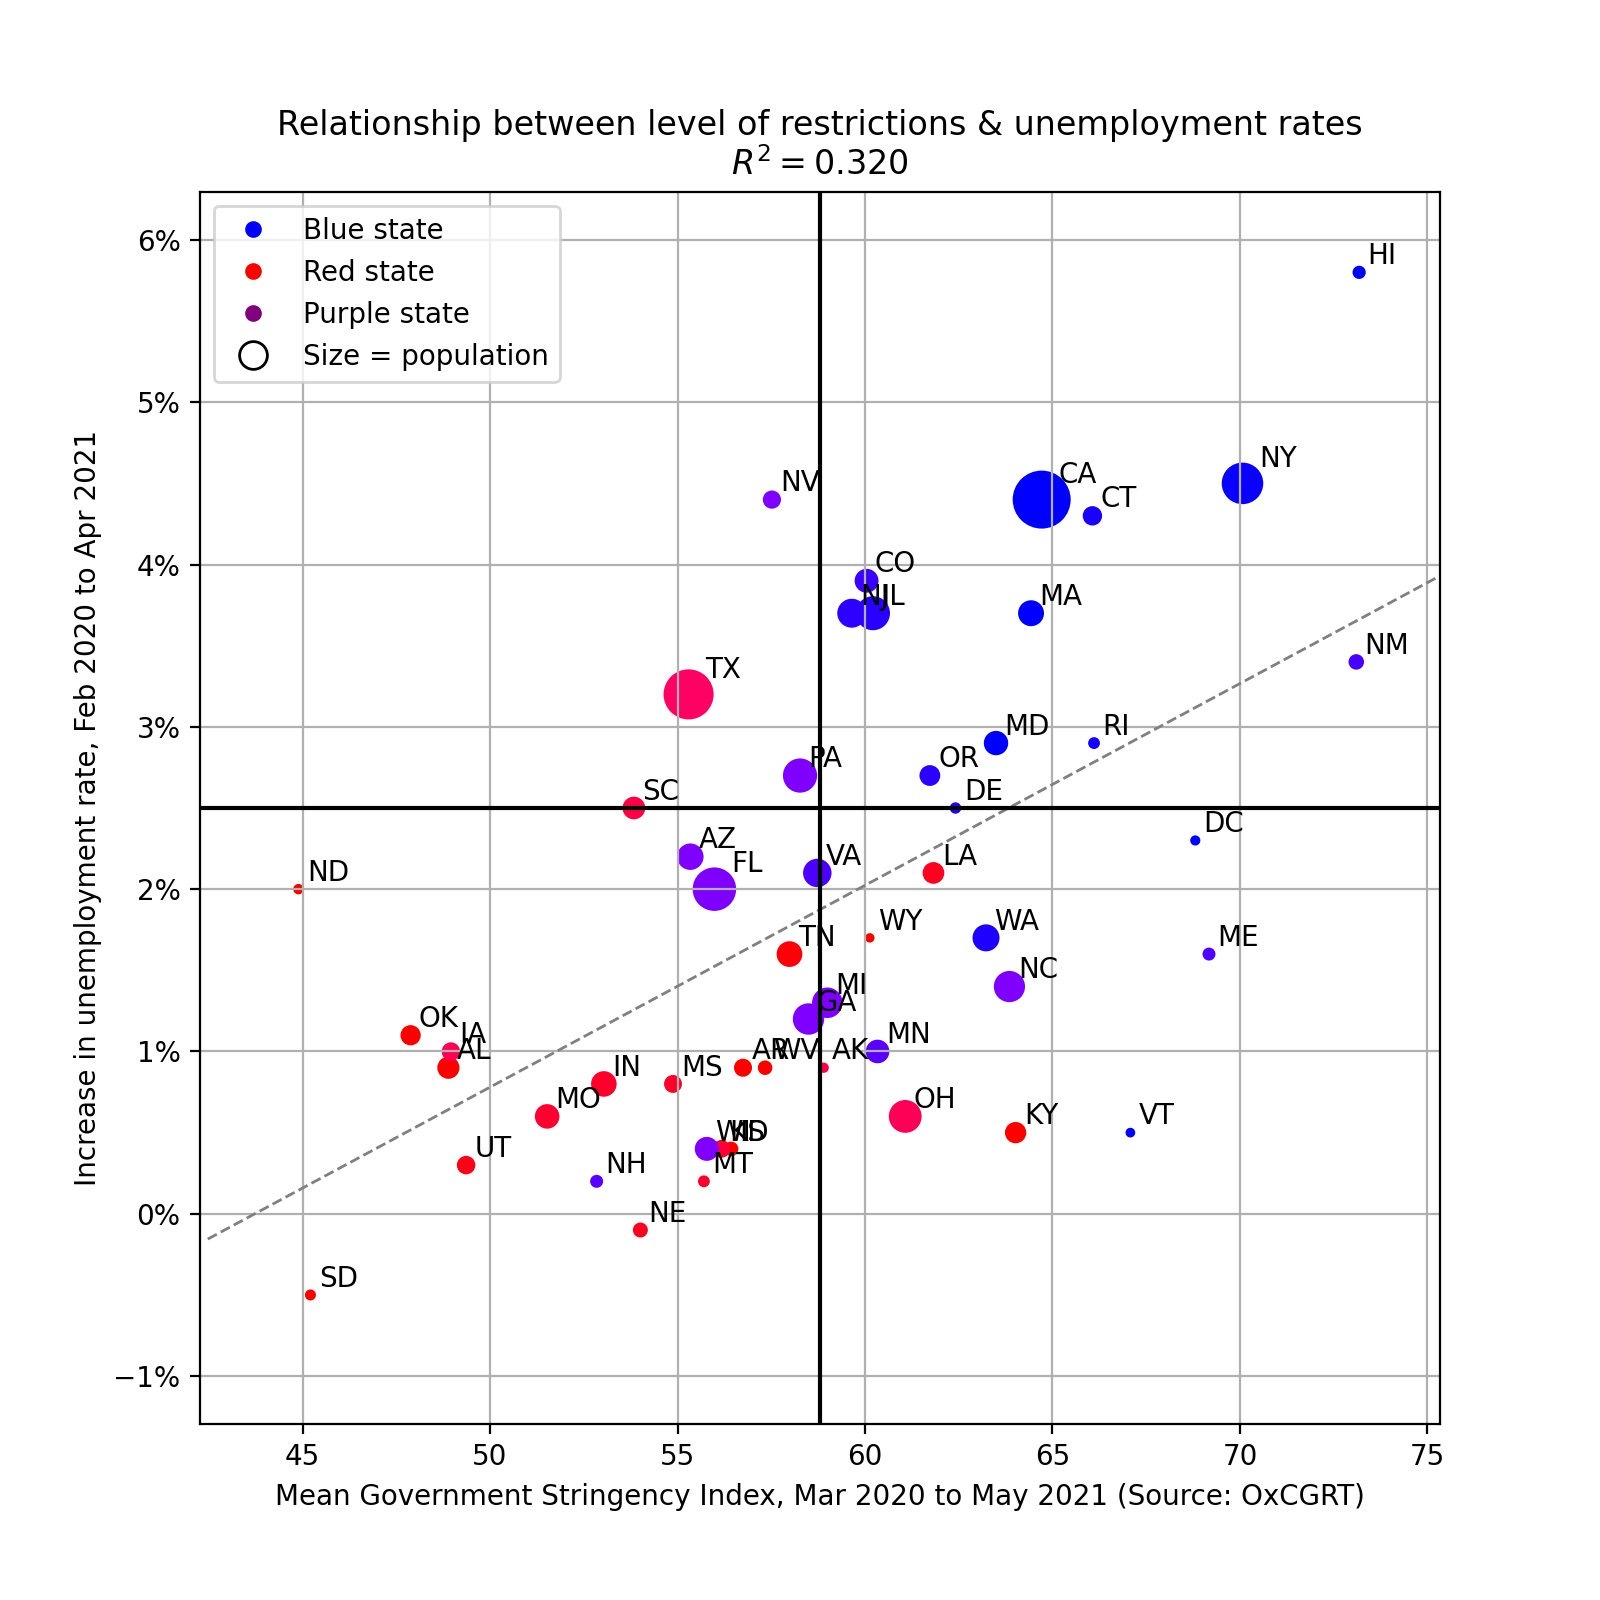

# Summary and Best Practices {#summary}

## EDA Best Practices

### 1. Start with Data Understanding
- Know your data source and collection method
- Understand the business context
- Identify the target variable and potential predictors

### 2. Systematic Approach
1. **Load and inspect** the data structure
2. **Assess data quality** (missing values, duplicates, inconsistencies)
3. **Univariate analysis** (distribution of each variable)
4. **Bivariate analysis** (relationships between variables)
5. **Multivariate analysis** (complex patterns)
6. **Generate insights** and hypotheses

### 3. Choose Appropriate Techniques
- **Categorical data**: Bar charts, frequency tables, chi-square tests
- **Numerical data**: Histograms, box plots, scatter plots, correlation
- **Mixed data**: Grouped analysis, conditional distributions

### 4. Handle Outliers Carefully
- **Investigate** before removing
- **Consider domain knowledge**
- **Document decisions** and rationale

### 5. Document Everything
- Keep track of data transformations
- Record assumptions and limitations
- Note interesting findings and potential issues

### 6. Iterate and Refine
- EDA is not a linear process
- New findings may lead to additional questions
- Be prepared to revisit earlier steps

## Common Pitfalls to Avoid

1. **Correlation ≠ Causation**: Strong correlation doesn't imply causal relationship
2. **Simpson's Paradox**: Relationships can reverse when data is aggregated
3. **Survivorship bias**: Only analyzing available data, ignoring missing cases
4. **Cherry picking**: Selecting only favorable results
5. **Over-interpreting**: Reading too much into random patterns

## Tools and Resources

### Python Libraries
- **pandas**: Data manipulation and analysis
- **matplotlib/seaborn**: Static visualization
- **plotly**: Interactive visualization  
- **scipy**: Statistical functions
- **sklearn**: Machine learning and preprocessing

### Automated EDA Tools
- **pandas-profiling**: Comprehensive automated reports
- **sweetviz**: Visual comparison and analysis
- **dataprep**: Fast EDA with beautiful visualizations

## Next Steps After EDA

1. **Feature Engineering**: Create new variables based on insights
2. **Data Preprocessing**: Handle missing values, encode categories, scale features
3. **Model Selection**: Choose appropriate algorithms based on data characteristics
4. **Hypothesis Testing**: Formal statistical tests for significant relationships
5. **Machine Learning**: Build predictive models using cleaned and understood data

Remember: **Good EDA is the foundation of successful data science projects!**

# Data Quality Assessment {#quality}

Before diving deep into analysis, it's crucial to assess data quality.

## Common Data Quality Issues

### 1. Missing Values
- **Types**: Missing Completely at Random (MCAR), Missing at Random (MAR), Missing Not at Random (MNAR)
- **Detection**: `df.isnull().sum()`, `df.info()`
- **Handling**: Drop, impute (mean/median/mode), forward fill, sophisticated methods

### 2. Duplicates
- **Detection**: `df.duplicated().sum()`
- **Handling**: `df.drop_duplicates()`

### 3. Inconsistent Data Types
- **Issues**: Numbers stored as strings, dates in wrong format
- **Detection**: `df.dtypes`, `df.describe()`
- **Handling**: Type conversion, data cleaning

### 4. Outliers and Anomalies
- **Impact**: Can skew analysis and models
- **Detection**: Statistical methods, visualization
- **Handling**: Remove, cap, transform, or investigate further